# E12: Normal Distribution Analysis of CPU Temperatures

## Objective

This exercise focuses on applying the concepts of the Normal distribution to model the steady-state temperature of a CPU. Given a mean ($\mu$) and a standard deviation ($\sigma$), our goals are to:
1.  Visualize the Probability Density Function (PDF) and the Cumulative Distribution Function (CDF).
2.  Standardize a specific temperature value by calculating its z-score.
3.  Calculate the probability of observing a temperature exceeding a certain threshold (a "right-tail" probability).
4.  Find the temperature that corresponds to a specific percentile of the distribution (an inverse CDF calculation).

## Setup and Distribution Definition

First, let's define the parameters of our Normal distribution for the CPU temperature.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Set plot style
sns.set_theme(style="whitegrid")

# --- Parameters of the Normal distribution for CPU temperature (T) ---
mu = 65  # Mean (μ) in degrees Celsius
sigma = 5 # Standard Deviation (σ) in degrees Celsius

# Create a "frozen" normal distribution object with our parameters
# This makes it easier to call its methods (pdf, cdf, etc.) later
T_dist = norm(loc=mu, scale=sigma)

print("Normal distribution object created successfully.")
print(f"Parameters: Mean (μ) = {T_dist.mean()}°C, Standard Deviation (σ) = {T_dist.std()}°C")

Normal distribution object created successfully.
Parameters: Mean (μ) = 65.0°C, Standard Deviation (σ) = 5.0°C


### (a) Plotting the PDF and CDF

A visual representation is often the best way to understand a probability distribution. We will plot the Probability Density Function (PDF), which shows the classic "bell curve," and the Cumulative Distribution Function (CDF), which shows the probability of the temperature being less than or equal to a given value.

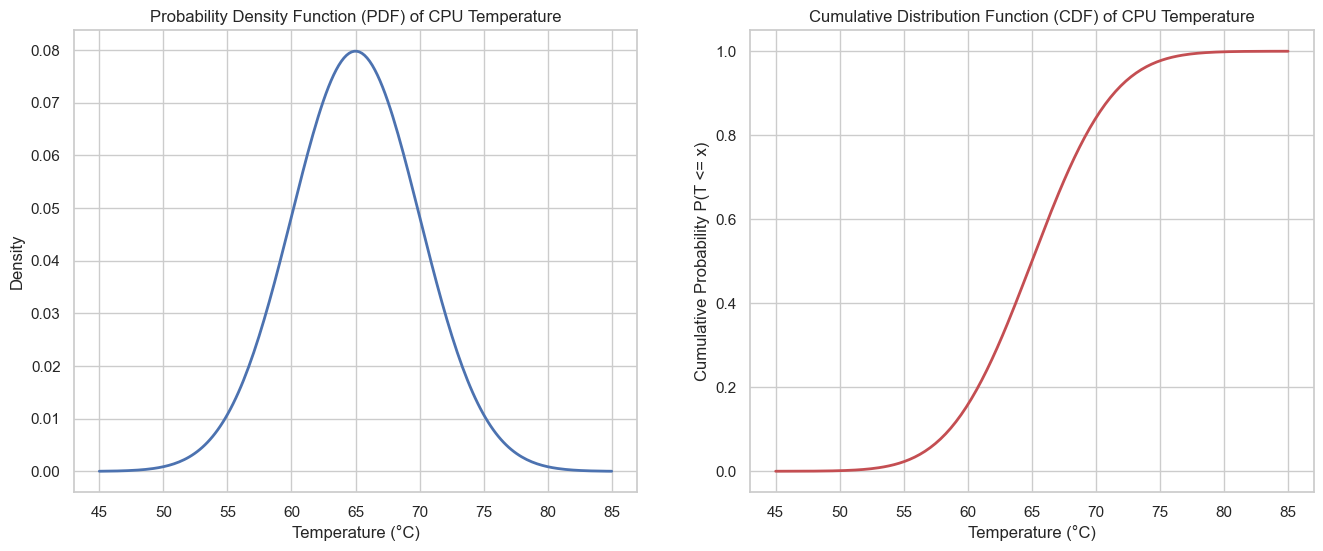

In [4]:
# --- (a) Plotting the PDF and CDF ---

# Generate a range of x values (temperatures) for plotting
# We go from -4 to +4 standard deviations from the mean to capture the whole curve
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)

# Calculate the PDF and CDF values for this range
pdf_values = T_dist.pdf(x_values)
cdf_values = T_dist.cdf(x_values)

# Create the plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: PDF
ax[0].plot(x_values, pdf_values, 'b-', lw=2)
ax[0].set_title('Probability Density Function (PDF) of CPU Temperature')
ax[0].set_xlabel('Temperature (°C)')
ax[0].set_ylabel('Density')
ax[0].grid(True)

# Plot 2: CDF
ax[1].plot(x_values, cdf_values, 'r-', lw=2)
ax[1].set_title('Cumulative Distribution Function (CDF) of CPU Temperature')
ax[1].set_xlabel('Temperature (°C)')
ax[1].set_ylabel('Cumulative Probability P(T <= x)')
ax[1].grid(True)

plt.show()

### (b) Calculating the Z-score

The z-score standardizes a value by indicating how many standard deviations it is away from the mean. We will calculate the z-score for a CPU temperature of 70°C.

In [5]:
# --- (b) Calculate the z-score for T = 70°C ---
temp_value = 70
z_score = (temp_value - mu) / sigma

print(f"The z-score for a temperature of {temp_value}°C is: {z_score:.2f}")

The z-score for a temperature of 70°C is: 1.00


### (c) Calculating a Right-Tail Probability

Here, we want to find the probability that the temperature exceeds 70°C, which corresponds to the area under the PDF curve to the right of 70. This is calculated as `1 - CDF(70)`. The `scipy` library provides a direct way to compute this using the Survival Function (`sf`).

In [6]:
# --- (c) Calculate P(T > 70°C) ---
temp_value = 70

# The survival function (sf) gives the probability P(T > x)
prob_greater_than_70 = T_dist.sf(temp_value)

print(f"The probability that the temperature is greater than {temp_value}°C is: {prob_greater_than_70:.4f}")
print(f"This means there is a {prob_greater_than_70:.2%} chance of the CPU temperature exceeding {temp_value}°C.")

The probability that the temperature is greater than 70°C is: 0.1587
This means there is a 15.87% chance of the CPU temperature exceeding 70°C.


### (d) Finding a Percentile (Inverse CDF)

Finally, we want to find the temperature value that corresponds to the 95th percentile. This means finding the temperature `T` such that `P(X <= T) = 0.95`. This is a job for the Percent Point Function (`ppf`), which is the inverse of the CDF.

In [7]:
# --- (d) Find the 95th percentile of the temperature distribution ---
percentile_value = 0.95
temperature_at_95th_percentile = T_dist.ppf(percentile_value)

print(f"The temperature corresponding to the {percentile_value:.0%} percentile is: {temperature_at_95th_percentile:.4f}°C.")
print(f"This means that 95% of the time, the CPU temperature is expected to be below {temperature_at_95th_percentile:.2f}°C.")

The temperature corresponding to the 95% percentile is: 73.2243°C.
This means that 95% of the time, the CPU temperature is expected to be below 73.22°C.


## Conclusion

This exercise provided a practical application of the Normal distribution to model CPU temperatures. Using the given mean ($\mu=65°C$) and standard deviation ($\sigma=5°C$), we successfully performed a complete analysis:

* We **visualized** the PDF and CDF, gaining an intuitive understanding of the temperature's behavior.
* We calculated the **z-score** for a temperature of 70°C, finding it to be **1.0**, meaning it is exactly one standard deviation above the mean.
* We determined the probability of the temperature **exceeding 70°C** to be approximately **15.87%**, a useful metric for risk assessment.
* Finally, we found the **95th percentile** of the temperature distribution to be **73.22°C**, identifying a key operational threshold.

The `scipy.stats.norm` package in Python proved to be a powerful and convenient tool for handling all these calculations related to the Normal distribution.